#A. SOME LIBRARY#

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#B. LOAD DATASET#

In [67]:
#cleveland.csv
!gdown --id "1-CdvL6QqQbOxnFY0q0EXZGgQC3zQD8-k"

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-CdvL6QqQbOxnFY0q0EXZGgQC3zQD8-k
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 28.9MB/s]


In [68]:
df = pd.read_csv("cleveland.csv", header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

In [69]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [71]:
#We reduce the number of labels. 0 means `NO` and 1 means `YES`
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [72]:
#Filling missing data with its column mean
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

#C. PLOT THE RELATIONSHIP#

##C.1 BETWEEN AGE AND TARGET##

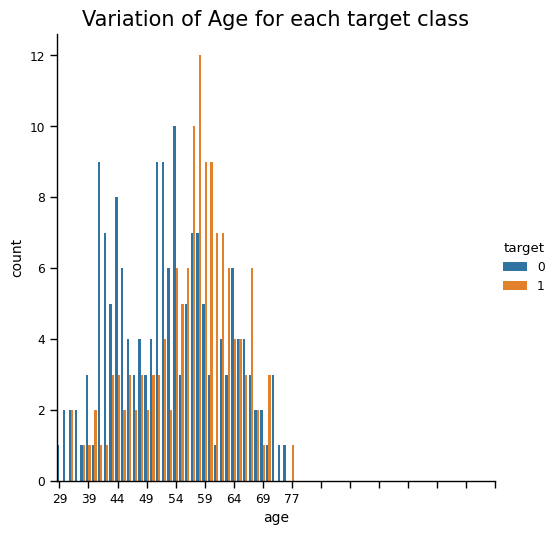

In [73]:
sns.set_context('paper', font_scale=1, rc={'font.size':3, 'axes.titlesize':15, 'axes.labelsize':10})
ax = sns.catplot(kind='count', data=df, x='age', hue='target', order=df['age'].sort_values().unique())
ax.ax.set_xticks(np.arange(0, 80, 5))
plt.title('Variation of Age for each target class')
plt.show()

##C.2 DISTRIBUTION OF AGE AND SEX WITH TARGET##

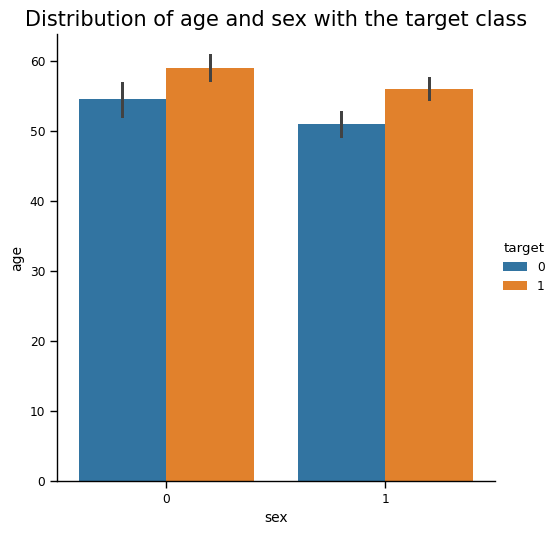

In [74]:
sns.catplot(kind='bar', data=df, x='sex', y='age', hue='target')
plt.title('Distribution of age and sex with the target class')
plt.show()

#D. PREPARE TRAING AND TEST#

In [75]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#E. SOLVE PROBLEMS BY SOME MACHINE LEARNING ALGORS#

##E.1 KNN##

In [76]:
from sklearn.neighbors import KNeighborsClassifier
#define the model
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, metric='minkowski')
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
#Predict the test set results
y_pred = classifier.predict(X_test)
confusion_matrix_test = confusion_matrix(y_pred, y_test)
y_pred_train = classifier.predict(X_train)
confusion_matrix_train = confusion_matrix(y_pred_train, y_train)
#For binary classification, C[0][0]: true negatives, C[1][1]: true positives

print()
accuracy_for_train = np.round((confusion_matrix_train[0][0] + confusion_matrix_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((confusion_matrix_test[0][0] + confusion_matrix_test[1][1])/len(y_test), 2)
print('Accuracy for training set for KNN = {}'.format(accuracy_for_train))
print('Accuracy for testing set for KNN = {}'.format(accuracy_for_test))


Accuracy for training set for KNN = 0.76
Accuracy for testing set for KNN = 0.69


##E.2 GAUSSIAN NAIVE BAYES##

In [78]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [79]:
#Predict the test set results
y_pred = classifier.predict(X_test)
confusion_matrix_test = confusion_matrix(y_pred, y_test)
y_pred_train = classifier.predict(X_train)
confusion_matrix_train = confusion_matrix(y_pred_train, y_train)
#For binary classification, C[0][0]: true negatives, C[1][1]: true positives

print()
accuracy_for_train = np.round((confusion_matrix_train[0][0] + confusion_matrix_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((confusion_matrix_test[0][0] + confusion_matrix_test[1][1])/len(y_test), 2)
print('Accuracy for training set for GaussianNB = {}'.format(accuracy_for_train))
print('Accuracy for testing set for GaussianNB = {}'.format(accuracy_for_test))


Accuracy for training set for GaussianNB = 0.85
Accuracy for testing set for GaussianNB = 0.84


##E.3 DICISION TREE##

In [80]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [81]:
#Predict the test set results
y_pred = classifier.predict(X_test)
confusion_matrix_test = confusion_matrix(y_pred, y_test)
y_pred_train = classifier.predict(X_train)
confusion_matrix_train = confusion_matrix(y_pred_train, y_train)
#For binary classification, C[0][0]: true negatives, C[1][1]: true positives

print()
accuracy_for_train = np.round((confusion_matrix_train[0][0] + confusion_matrix_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((confusion_matrix_test[0][0] + confusion_matrix_test[1][1])/len(y_test), 2)
print('Accuracy for training set for Decision Tree = {}'.format(accuracy_for_train))
print('Accuracy for testing set for Decision Tree = {}'.format(accuracy_for_test))


Accuracy for training set for Decision Tree = 1.0
Accuracy for testing set for Decision Tree = 0.72


##E.4 RANDOM FOREST##

In [82]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [83]:
#Predict the test set results
y_pred = classifier.predict(X_test)
confusion_matrix_test = confusion_matrix(y_pred, y_test)
y_pred_train = classifier.predict(X_train)
confusion_matrix_train = confusion_matrix(y_pred_train, y_train)
#For binary classification, C[0][0]: true negatives, C[1][1]: true positives

print()
accuracy_for_train = np.round((confusion_matrix_train[0][0] + confusion_matrix_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((confusion_matrix_test[0][0] + confusion_matrix_test[1][1])/len(y_test), 2)
print('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train))
print('Accuracy for testing set for Random Forest = {}'.format(accuracy_for_test))


Accuracy for training set for Random Forest = 0.98
Accuracy for testing set for Random Forest = 0.8


##E.5 ADABOOST##

In [84]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, random_state=42)

In [85]:
#Predict the test set results
y_pred = classifier.predict(X_test)
confusion_matrix_test = confusion_matrix(y_pred, y_test)
y_pred_train = classifier.predict(X_train)
confusion_matrix_train = confusion_matrix(y_pred_train, y_train)
#For binary classification, C[0][0]: true negatives, C[1][1]: true positives

print()
accuracy_for_train = np.round((confusion_matrix_train[0][0] + confusion_matrix_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((confusion_matrix_test[0][0] + confusion_matrix_test[1][1])/len(y_test), 2)
print('Accuracy for training set for Adaboost = {}'.format(accuracy_for_train))
print('Accuracy for testing set for Adaboost = {}'.format(accuracy_for_test))


Accuracy for training set for Adaboost = 0.91
Accuracy for testing set for Adaboost = 0.84


##E.6 GRADIENT BOOST##

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(learning_rate=0.1,
                                        n_estimators=100,
                                        subsample=1.0,
                                        min_samples_split=2,
                                        max_depth=3,
                                        random_state=42)
classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [87]:
#Predict the test set results
y_pred = classifier.predict(X_test)
confusion_matrix_test = confusion_matrix(y_pred, y_test)
y_pred_train = classifier.predict(X_train)
confusion_matrix_train = confusion_matrix(y_pred_train, y_train)
#For binary classification, C[0][0]: true negatives, C[1][1]: true positives

print()
accuracy_for_train = np.round((confusion_matrix_train[0][0] + confusion_matrix_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((confusion_matrix_test[0][0] + confusion_matrix_test[1][1])/len(y_test), 2)
print('Accuracy for training set for Gradient Boost = {}'.format(accuracy_for_train))
print('Accuracy for testing set for Gradient Boost = {}'.format(accuracy_for_test))


Accuracy for training set for Gradient Boost = 1.0
Accuracy for testing set for Gradient Boost = 0.85


##E.6 XGBOOST##

In [88]:
from xgboost import XGBClassifier
xg = XGBClassifier(objective='binary:logistic', random_state=42, n_estimators=100)
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [89]:
#Predict the test set results
y_pred = xg.predict(X_test)
confusion_matrix_test = confusion_matrix(y_pred, y_test)
y_pred_train = xg.predict(X_train)
confusion_matrix_train = confusion_matrix(y_pred_train, y_train)
#For binary classification, C[0][0]: true negatives, C[1][1]: true positives

print()
accuracy_for_train = np.round((confusion_matrix_train[0][0] + confusion_matrix_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((confusion_matrix_test[0][0] + confusion_matrix_test[1][1])/len(y_test), 2)
print('Accuracy for training set for XGBoost = {}'.format(accuracy_for_train))
print('Accuracy for testing set for XGBoost = {}'.format(accuracy_for_test))


Accuracy for training set for XGBoost = 1.0
Accuracy for testing set for XGBoost = 0.84


##E.7 SVM##

In [90]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(X_train, y_train)

SVC(random_state=42)

In [91]:
#Predict the test set results
y_pred = xg.predict(X_test)
confusion_matrix_test = confusion_matrix(y_pred, y_test)
y_pred_train = xg.predict(X_train)
confusion_matrix_train = confusion_matrix(y_pred_train, y_train)
#For binary classification, C[0][0]: true negatives, C[1][1]: true positives

print()
accuracy_for_train = np.round((confusion_matrix_train[0][0] + confusion_matrix_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((confusion_matrix_test[0][0] + confusion_matrix_test[1][1])/len(y_test), 2)
print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for testing set for SVM = {}'.format(accuracy_for_test))


Accuracy for training set for SVM = 1.0
Accuracy for testing set for SVM = 0.84


#F. STACKING#

In [92]:
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, metric='minkowski')
gc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3,random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

In [93]:
clf = [('dtc', dtc), ('rfc', rfc), ('knn', knn), ('gc', gc), ('svc', svc), ('ad', ad)] #list of (str, estimator)
from sklearn.ensemble import StackingClassifier
xgb = XGBClassifier()
classifier = StackingClassifier(estimators=clf, final_estimator=xgb)
classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('dtc', DecisionTreeClassifier(random_state=42)),
                               ('rfc',
                                RandomForestClassifier(max_depth=10,
                                                       n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('gc',
                                GradientBoostingClassifier(random_state=42)),
                               ('svc', SVC(random_state=42)),
                               ('ad', AdaBoostClassifier(random_state=42))],
                   final_estimator=XGBClassifier(base_scor...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=None, ...))

In [94]:
#Predict the test set results
y_pred = xg.predict(X_test)
confusion_matrix_test = confusion_matrix(y_pred, y_test)
y_pred_train = xg.predict(X_train)
confusion_matrix_train = confusion_matrix(y_pred_train, y_train)
#For binary classification, C[0][0]: true negatives, C[1][1]: true positives

print()
accuracy_for_train = np.round((confusion_matrix_train[0][0] + confusion_matrix_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((confusion_matrix_test[0][0] + confusion_matrix_test[1][1])/len(y_test), 2)
print('Accuracy for training set for Stacking = {}'.format(accuracy_for_train))
print('Accuracy for testing set for Stacking = {}'.format(accuracy_for_test))


Accuracy for training set for Stacking = 1.0
Accuracy for testing set for Stacking = 0.84
